C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


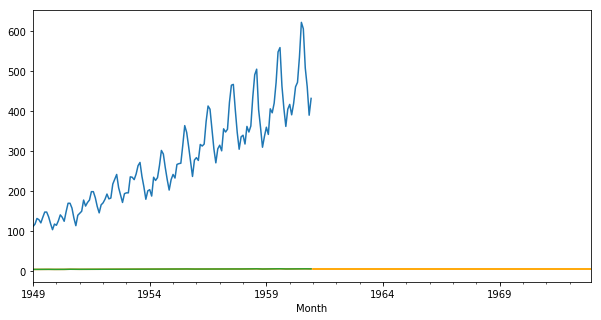

In [2]:

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # major lib for smoothening
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.seterr(divide = 'ignore') 


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

dataset = pd.read_csv('C:/Users/DELL/Desktop/JT/AirPassengers.csv',parse_dates=['Month'],
                     index_col='Month',date_parser=dateparse)

ds = dataset['#Passengers']
ds.head()


ds.plot(kind="line",figsize=(10,5))

my_data = np.log(ds)


# In[30]:


fit1 = SimpleExpSmoothing(my_data).fit(smoothing_level=0.6,optimized=False)
fit1_1 = fit1.forecast(len(my_data))

my_data.plot(kind="line",figsize=(10,5))
fit1_1.plot(kind="line",figsize=(10,5),color='orange')


'''
fit2 = SimpleExpSmoothing(my_data).fit(smoothing_level=0.1,optimized=False)
fit2_2 = fit2.forecast(len(my_data))
my_data.plot(kind="line",figsize=(10,5))
fit1_1.plot(kind="line",figsize=(10,5),color='orange')
'''


# In[31]:


fit3 = SimpleExpSmoothing(my_data).fit()
fit3_3 = fit3.forecast(len(my_data)).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
my_data.plot(kind="line",figsize=(10,5))
fit3_3.plot(kind="line",figsize=(10,5),color='orange')
